In [73]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
import seaborn as sns  # pretty plotting, including heat map

import os
from IPython.display import display

Check current dirctory

In [266]:
CSV_PATH='mspa-survey-data.csv'
valid_survey_input = pd.read_csv(CSV_PATH)
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)
#valid_survey_input.head()


# Basic descriptive statistics

Examine the structure of the DataFrame object

In [267]:
#display(valid_survey_input.info())
print('\nNumber of Respondents =', len(valid_survey_input)) 
#print (valid_survey_input.info())
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
survey_df = survey_df.loc[:, ~survey_df.columns.str.startswith('PREDICT')]

print('\n Dataset Basic Descriptive Statistics') 
display(survey_df.describe())

print('\nDataset first 5 records (head)')
display(survey_df.head())

print('\n Dataset Correlation matrix')
corr_matrix= survey_df.corr()
display(corr_matrix["Courses_Completed"].sort_values(ascending=False))





Number of Respondents = 207

 Dataset Basic Descriptive Statistics


,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000



Dataset first 5 records (head)


,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,...,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,50.0,90.0,51.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,20.0,50.0,90.0,50.0,6.0,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,100.0,70.0,100.0,60.0,4.0,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,85.0,60.0,90.0,82.0,7.0,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,60.0,10.0,40.0,80.0,7.0,NaN,NaN,NaN,CS-435 with Weka,Fall 2018



 Dataset Correlation matrix


Courses_Completed                   1.000000
Ind_SAS                             0.128071
Prof_Java                           0.105902
My_Java                             0.067779
Prof_SAS                            0.066543
My_R                                0.048150
My_SAS                              0.044622
Ind_Java                            0.044560
Prof_JS                             0.014519
Prof_R                              0.005477
Ind_R                              -0.007437
Python_Course_Interest             -0.047676
My_Python                          -0.056593
Ind_Python                         -0.067259
Systems_Analysis_Course_Interest   -0.095623
Foundations_DE_Course_Interest     -0.116153
Prof_Python                        -0.149791
Analytics_App_Course_Interest      -0.165540
My_JS                              -0.172633
Ind_JS                             -0.177642
Name: Courses_Completed, dtype: float64

# Visualize dataset

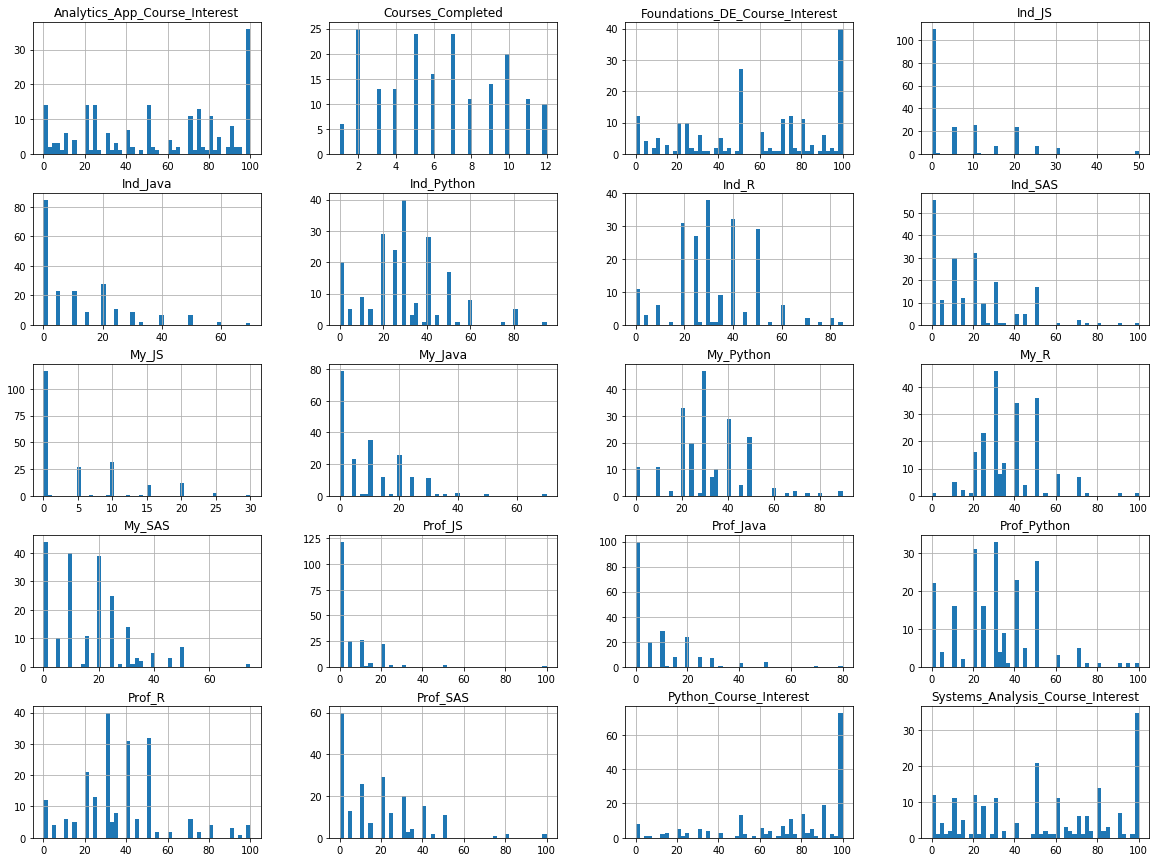

In [44]:
survey_df.hist( bins=50 , figsize=(20,15))
plt.show()

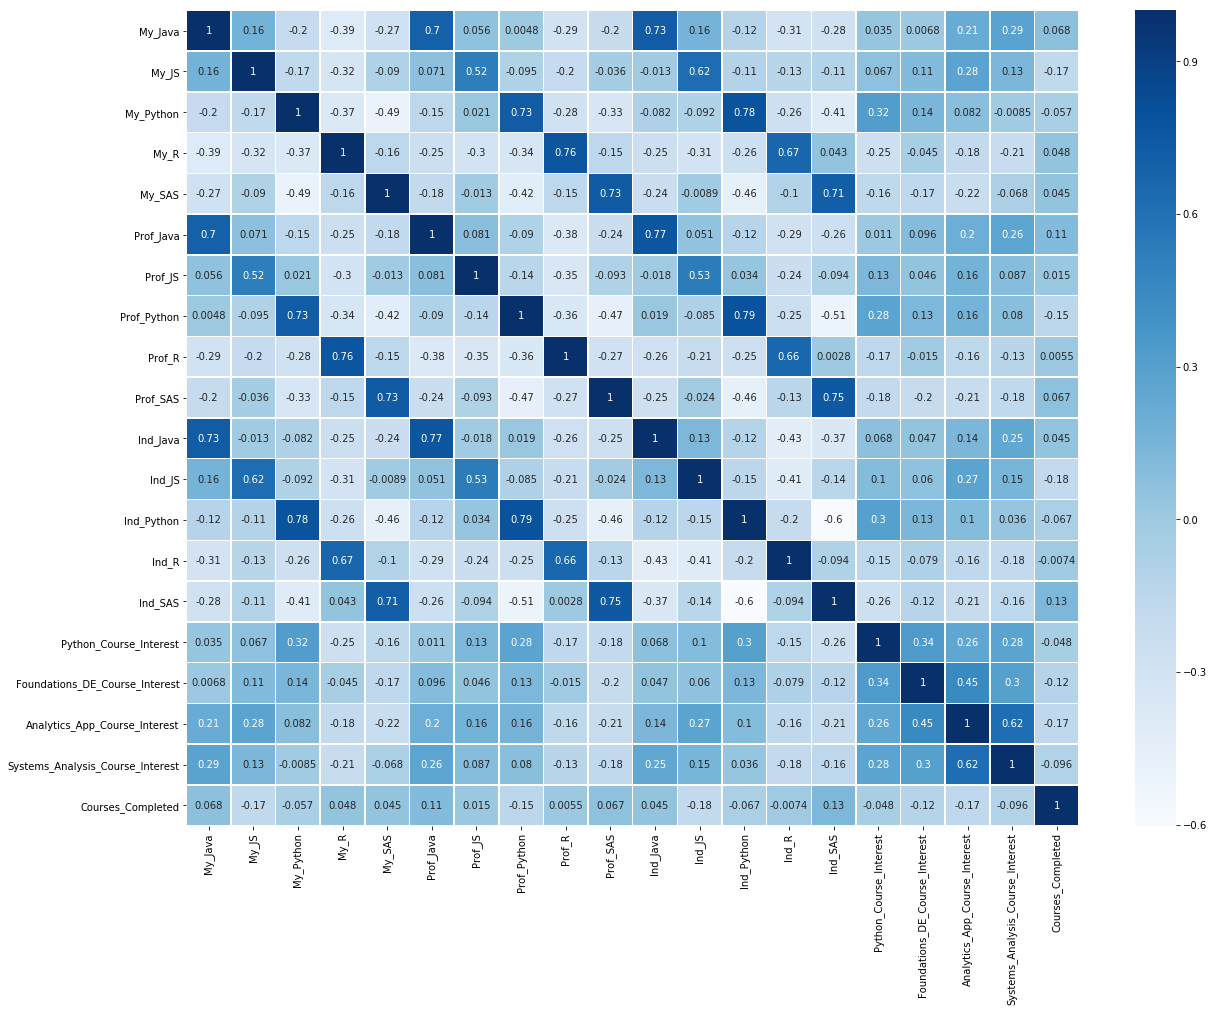

In [60]:
fig, ax = plt.subplots(figsize=(20,15)) # Sample figsize in inches

sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, 
        annot=True, linewidths=.5, ax=ax ,  cmap="Blues")


Descriptive statistics for survey data ---------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.415459   18.463768   11.942029   
std 

<Figure size 432x288 with 0 Axes>

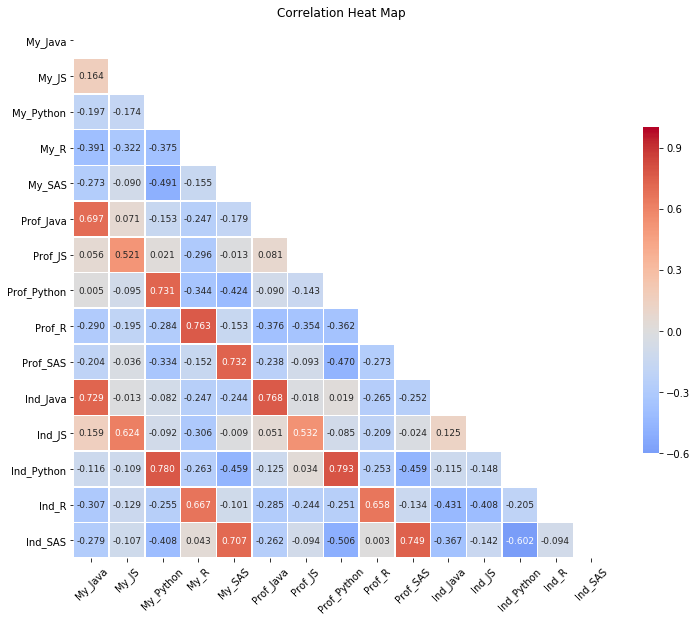

In [72]:
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
print(software_df.describe())

# descriptive statistics for one variable
print('\nDescriptive statistics for courses completed ---------------')
print(survey_df['Courses_Completed'].describe())


# Transformations

In [293]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()
Z = X.values.reshape(187,-1)
YY = survey_df.loc[:, ('Analytics_App_Course_Interest','Courses_Completed')].dropna()

Z

array([[ 6.],
       [ 4.],
       [ 7.],
       [ 7.],
       [ 5.],
       [11.],
       [ 2.],
       [ 3.],
       [ 6.],
       [ 3.],
       [ 2.],
       [ 7.],
       [ 3.],
       [ 4.],
       [ 2.],
       [12.],
       [ 7.],
       [ 5.],
       [ 6.],
       [ 8.],
       [12.],
       [ 9.],
       [12.],
       [ 2.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 2.],
       [ 9.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 1.],
       [ 5.],
       [ 5.],
       [11.],
       [ 5.],
       [ 6.],
       [10.],
       [ 6.],
       [ 9.],
       [10.],
       [ 4.],
       [ 4.],
       [ 7.],
       [ 5.],
       [ 3.],
       [ 7.],
       [10.],
       [ 7.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 3.],
       [ 6.],
       [ 7.],
       [ 6.],
       [ 8.],
       [10.],
       [ 5.],
       [ 2.],
       [ 3.],
       [ 7.],
       [ 5.],
       [ 2.],
       [ 8.],
       [ 4.],
       [ 7.],
       [ 8.],
       [ 5.],
       [11.],
      

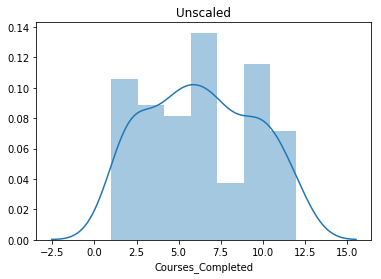

In [264]:
unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

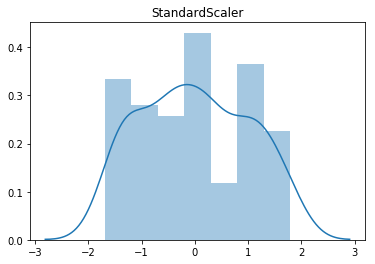

In [294]:
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(Z)).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

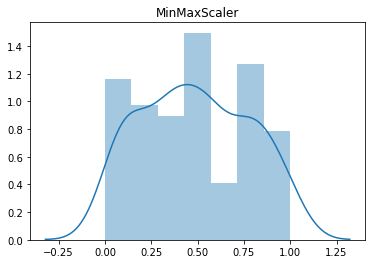

In [295]:
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(Z)).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 

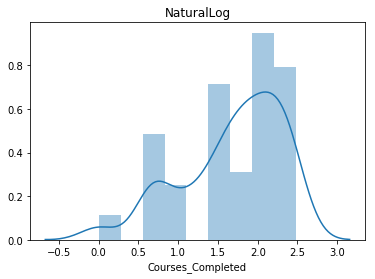

In [296]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  